In [2]:
# install.packages("ggbeeswarm")
# install.packages("reshape2")
# install.packages("ggrepel")

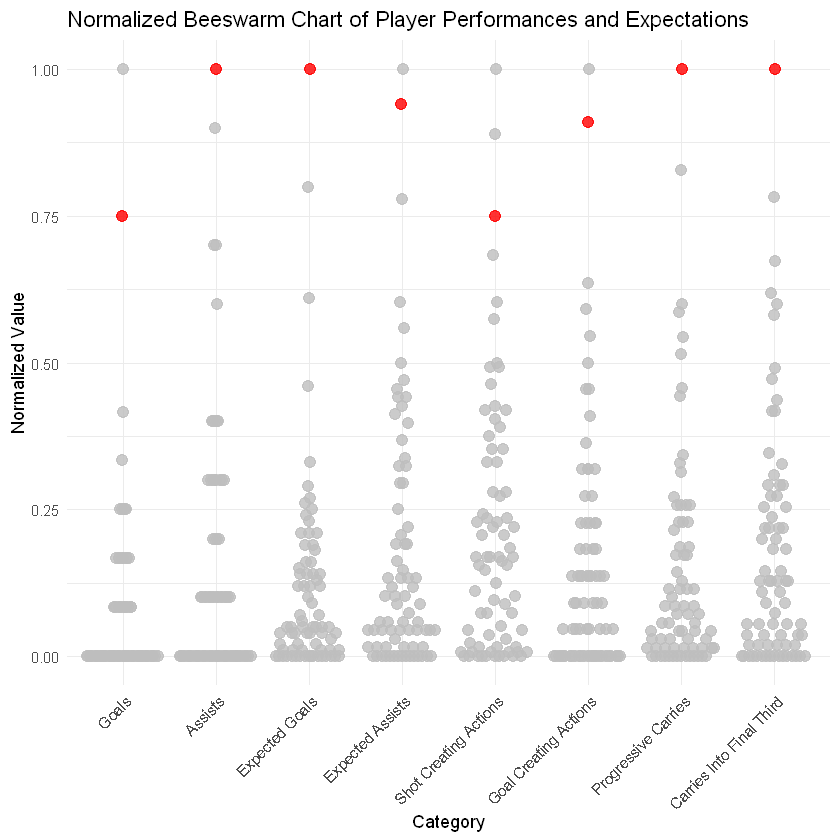

In [25]:
# Load necessary libraries
library(ggplot2)
library(ggbeeswarm)
library(reshape2)
library(ggrepel)
library(dplyr)

# Read the data into a dataframe
data <- read.csv("data.csv")

# data_normalized <- data %>%
#   mutate(across(-Player, scale))  # Using 'scale' for Z-score normalization

min_max_scale <- function(x) {
  (x - min(x)) / (max(x) - min(x))
}

# Apply the min-max scaling to all columns except for 'Player'
data_normalized <- data %>%
  mutate(across(-Player, min_max_scale))

# Add a new column for labeling only Bonmati
data_normalized$Label <- ifelse(data_normalized$Player == "Aitana Bonmatí", as.character(data$Player), NA)

# Reshape the data from wide to long format, including the new Label column
data_long <- melt(data_normalized, id.vars = c("Player", "Label"), variable.name = "Category", value.name = "Value")

# Rename the categories
data_long$Category <- factor(data_long$Category,
                             levels = c("Performance_Gls", "Performance_Ast", "Expected_xG", "Expected_xAG", 
                                        "SCA_SCA", "GCA_GCA", "Carries_Prg", "Carries_13"),
                             labels = c("Goals", "Assists", "Expected Goals", "Expected Assists",
                                        "Shot Creating Actions", "Goal Creating Actions", 
                                        "Progressive Carries", "Carries Into Final Third"))

# Create a new column for point colors
data_long$PointColor <- ifelse(data_long$Player == "Aitana Bonmatí", "red", "grey")

# Now plot using ggplot2 and ggbeeswarm
ggplot(data_long, aes(x = Category, y = Value)) +
  geom_quasirandom(aes(color = PointColor), size = 3, alpha = 0.8, show.legend = FALSE) +
  scale_color_identity() +  # Use the actual colors specified in the PointColor column
  theme_minimal() +
  labs(title = "Normalized Beeswarm Chart of Player Performances and Expectations",
       x = "Category",
       y = "Normalized Value") +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1) # Rotates x-axis labels and adjusts horizontal justification
  ) #+
  # geom_text_repel(
  #   data = subset(data_long, Label == "Aitana Bonmatí"),
  #   aes(label = Label),
  #   box.padding = 0.5,
  #   point.padding = 0.5,
  #   segment.color = NA, # No line to the label
  #   size = 3, # Adjust text size as needed
  #   max.overlaps = Inf # Allow for some overlap
  # )